Tempo entre picos (em μs):
[ 2.  12.4  2.2 11.6  1.7 12.2 14. ]


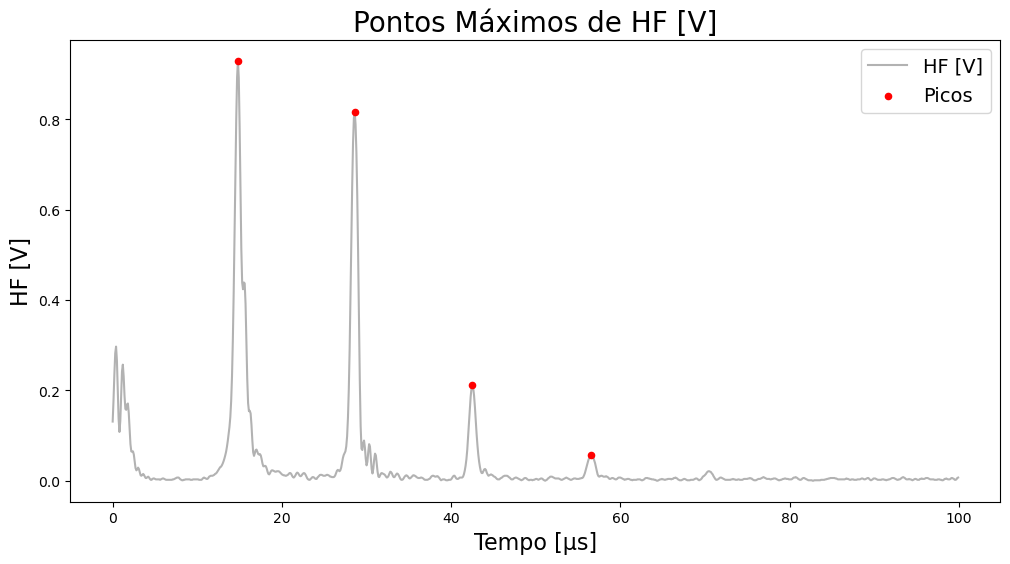

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Inicialização
xvals = []  # Coluna time [ľs]
yvals = []  # Coluna HF [V]
skips = 0

# Leitura de Dados com a codificação ISO-8859-1 para evitar erro UnicodeDecodeError
with open("/Users/emanuelmiranda/Desktop/Exp7/Dados/tubo 4_1.txt", "r", encoding="ISO-8859-1") as data:
    for line in data:
        if skips == 0:
            skips += 1  # Ignorar a primeira linha com cabeçalhos
            continue
        linha = line.split("\t")
        if len(linha) > 1:
            x = float(linha[0].replace(",", "."))  # Substituir vírgula por ponto
            y = float(linha[1].replace(",", "."))  # Substituir vírgula por ponto
            xvals.append(x)
            yvals.append(y)

# Definir parâmetros para detetar picos
altura_min = 0.05  # Mínima altura que um pico precisa ter
distancia_min = 15  # Mínima distância entre picos, em número de amostras

# Identificação dos picos (máximos locais) nos dados
picos, _ = find_peaks(yvals, height=altura_min, distance=distancia_min)

# Cálculo da distância entre picos (tempo entre picos)
tempos_picos = np.array(xvals)[picos]
diferencas_tempos = np.diff(tempos_picos)  # Diferença entre tempos consecutivos

# Print das distâncias (tempos entre picos)
print("Tempo entre picos (em μs):")
print(diferencas_tempos)

# Excluir os picos 1, 2, 4 e 6 (índices 0, 1, 3, 5)
indices_a_excluir = [0, 1, 3, 5]
tempos_picos_filtrados = np.delete(tempos_picos, indices_a_excluir)
valores_picos_filtrados = np.delete(np.array(yvals)[picos], indices_a_excluir)

# Gráfico com os pontos máximos
fig, ax = plt.subplots(figsize=(12, 6))  # Aumenta a largura e diminui a altura
ax.set_title("Pontos Máximos de HF [V]", fontsize=20)
ax.set_ylabel("HF [V]", fontsize=16)
ax.set_xlabel("Tempo [μs]", fontsize=16)

# Gráfico original com todos os pontos
ax.plot(xvals, yvals, label="HF [V]", color="gray", alpha=0.6)

# Gráfico apenas com os picos filtrados
ax.scatter(tempos_picos_filtrados, valores_picos_filtrados, color="red", label="Picos", s=20, zorder=6)

# Legenda e exibição do gráfico
ax.legend(fontsize=14)
plt.show()

Declive (slope): 2.7050 mm/μs
Interseção no zero (intercept): -2.2983 mm
R²: 0.99998965
Valor de x quando a reta intercepta a origem: 0.8496 μs


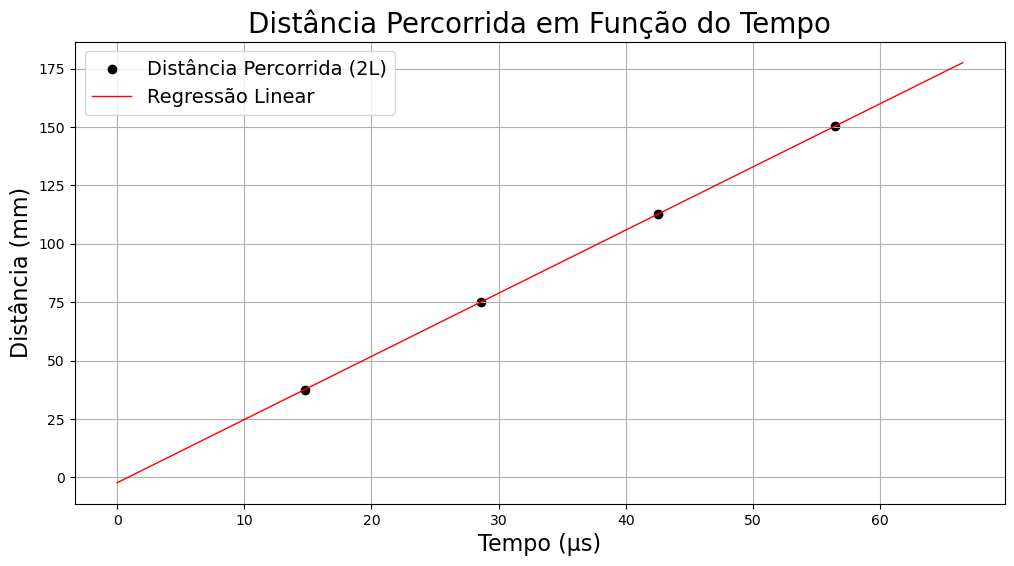

[14.8 28.6 42.5 56.5] [ 37.6  75.2 112.8 150.4]


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import linregress

# Cálculo da distância acumulada (2L para cada pico)
L = 18.8  # comprimento do cilindro em mm
# Distância acumulada começando em 2L
distancia_acumulada = 2 * L * (np.arange(len(tempos_picos_filtrados)) + 1)  # Distância: 2L, 4L, 6L, ...

# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(tempos_picos_filtrados, distancia_acumulada)

# Gráfico da distância percorrida em função do tempo
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Distância Percorrida em Função do Tempo", fontsize=20)
ax.set_ylabel("Distância (mm)", fontsize=16)
ax.set_xlabel("Tempo (μs)", fontsize=16)

# Gráfico da distância percorrida em função do tempo dos picos (apenas marcadores)
ax.scatter(tempos_picos_filtrados, distancia_acumulada, color='black', label='Distância Percorrida (2L)', marker='o')

# Gerar valores de x para a reta de ajuste, estendendo para a origem
x_fit = np.linspace(0, max(tempos_picos_filtrados) + 10, 100)  # 10μs a mais para melhor visualização
y_fit = slope * x_fit + intercept

# Gráfico da regressão linear
ax.plot(x_fit, y_fit, color='red', label='Regressão Linear', linewidth=1)

# Legenda e exibição do gráfico
ax.legend(fontsize=14)

# Print do declive, da interseção no zero e do R² com mais casas decimais
print(f"Declive (slope): {slope:.4f} mm/μs")
print(f"Interseção no zero (intercept): {intercept:.4f} mm")
print(f"R²: {r_value**2:.8f}")  # Mais casas decimais para R²

# Cálculo do valor de x quando a reta intercepta a origem
if slope != 0:  # Para evitar divisão por zero
    x_intercept = -intercept / slope
    print(f"Valor de x quando a reta intercepta a origem: {x_intercept:.4f} μs")
else:
    print("O declive é zero; a reta não intercepta a origem.")

plt.grid(True)
# Exibição do gráfico
plt.show()

# Exibir os tempos e distâncias
print(tempos_picos_filtrados, distancia_acumulada)

## Cilindro 1

Comprimento do tubo a partir dos dados: 79.60 mm


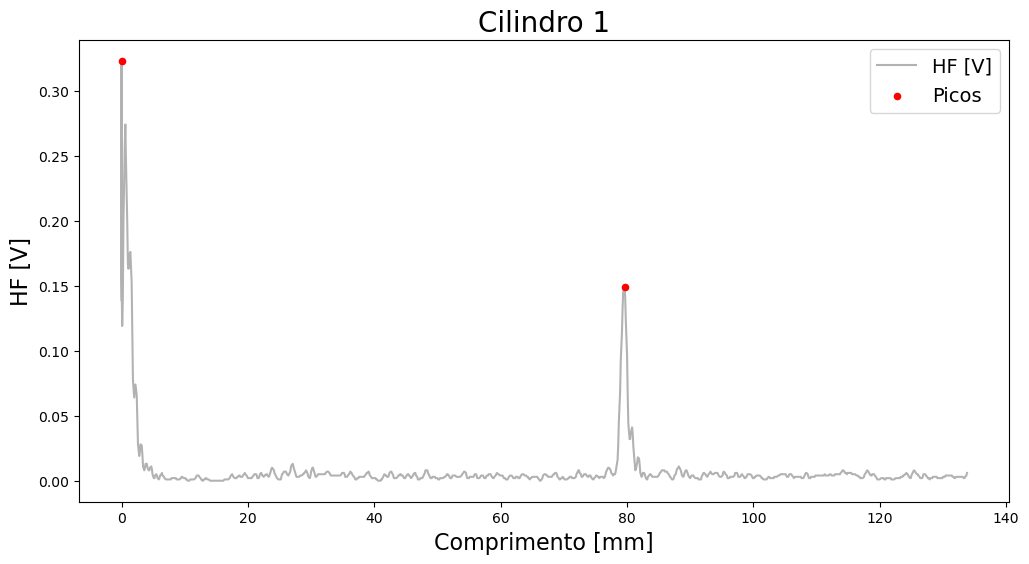

Tempos/Comprimentos dos picos: [ 0.  79.6]
Valores dos picos (HF [V]): [0.323 0.149]


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Inicialização
xvals = []  # Coluna de tempo [μs] ou comprimento [mm]
yvals = []  # Coluna HF [V]
skips = 0
is_time_in_microseconds = None  # Variável para verificar a unidade

# Leitura de Dados com a codificação ISO-8859-1 para evitar erro UnicodeDecodeError
with open("/Users/emanuelmiranda/Desktop/Exp7/Dados/tubo 1_1.txt", "r", encoding="ISO-8859-1") as data:
    for line in data:
        if skips == 0:
            skips += 1  # Ignorar a primeira linha com cabeçalhos
            continue
        linha = line.split("\t")
        if len(linha) > 1:
            x_str = linha[0].replace(",", ".")
            y = float(linha[1].replace(",", "."))
            
            # Verificar se a primeira coluna é tempo em μs (caso de tubo 4_1) ou comprimento em mm
            if is_time_in_microseconds is None:
                is_time_in_microseconds = "μs" in line or float(x_str) > 1.0  # heurística baseada em valores
            
            x = float(x_str)
            xvals.append(x)
            yvals.append(y)

# Definir parâmetros para detetar picos
altura_min = 0.05  # Mínima altura que um pico precisa ter
distancia_min = 50  # Mínima distância entre picos, em número de amostras

# Identificação dos picos (máximos locais) nos dados
picos, _ = find_peaks(yvals, height=altura_min, distance=distancia_min)

# Obter os valores de tempo/comprimento e HF correspondentes aos picos
tempos_comprimento_picos = np.array(xvals)[picos]
valores_picos = np.array(yvals)[picos]

# Se for tempo, converter o segundo pico em comprimento usando a velocidade do som
if is_time_in_microseconds:
    velocidade_som = 2699.2  # mm/μs
    comprimento_tubo = (tempos_comprimento_picos[1] - tempos_comprimento_picos[0]) * velocidade_som / 2
    print(f"Comprimento do tubo calculado: {comprimento_tubo:.2f} mm")
else:
    comprimento_tubo = tempos_comprimento_picos[1] - tempos_comprimento_picos[0]
    print(f"Comprimento do tubo a partir dos dados: {comprimento_tubo:.2f} mm")

# Gráfico dos dados completos com os máximos
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Cilindro 1", fontsize=20)
ax.set_ylabel("HF [V]", fontsize=16)
ax.set_xlabel("Tempo [μs]" if is_time_in_microseconds else "Comprimento [mm]", fontsize=16)

# Gráfico original com todos os pontos
ax.plot(xvals, yvals, label="HF [V]", color="gray", alpha=0.6)

# Gráfico apenas com os picos (máximos) detectados
ax.scatter(tempos_comprimento_picos, valores_picos, color="red", label="Picos", s=20, zorder=5)

# Legenda e exibição do gráfico
ax.legend(fontsize=14)
plt.show()

# Print dos tempos/comprimentos e valores dos picos
print("Tempos/Comprimentos dos picos:", tempos_comprimento_picos)
print("Valores dos picos (HF [V]):", valores_picos)


## Cilindro 3

Comprimento do tubo a partir dos dados: 40.20 mm


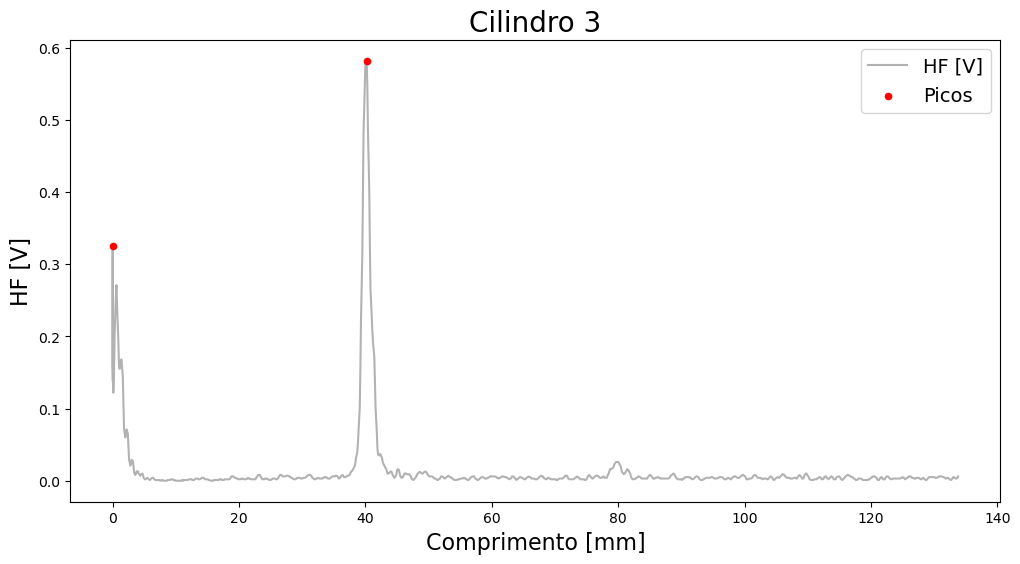

Tempos/Comprimentos dos picos: [ 0.  40.2]
Valores dos picos (HF [V]): [0.325 0.582]


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Inicialização
xvals = []  # Coluna de tempo [μs] ou comprimento [mm]
yvals = []  # Coluna HF [V]
skips = 0
is_time_in_microseconds = None  # Variável para verificar a unidade

# Leitura de Dados com a codificação ISO-8859-1 para evitar erro UnicodeDecodeError
with open("/Users/emanuelmiranda/Desktop/Exp7/Dados/tubo 3_1.txt", "r", encoding="ISO-8859-1") as data:
    for line in data:
        if skips == 0:
            skips += 1  # Ignorar a primeira linha com cabeçalhos
            continue
        linha = line.split("\t")
        if len(linha) > 1:
            x_str = linha[0].replace(",", ".")
            y = float(linha[1].replace(",", "."))
            
            # Verificar se a primeira coluna é tempo em μs (caso de tubo 4_1) ou comprimento em mm
            if is_time_in_microseconds is None:
                is_time_in_microseconds = "μs" in line or float(x_str) > 1.0  # heurística baseada em valores
            
            x = float(x_str)
            xvals.append(x)
            yvals.append(y)

# Definir parâmetros para detetar picos
altura_min = 0.05  # Mínima altura que um pico precisa ter
distancia_min = 50  # Mínima distância entre picos, em número de amostras

# Identificação dos picos (máximos locais) nos dados
picos, _ = find_peaks(yvals, height=altura_min, distance=distancia_min)

# Obter os valores de tempo/comprimento e HF correspondentes aos picos
tempos_comprimento_picos = np.array(xvals)[picos]
valores_picos = np.array(yvals)[picos]

# Se for tempo, converter o segundo pico em comprimento usando a velocidade do som
if is_time_in_microseconds:
    velocidade_som = 2699.2  # mm/μs
    comprimento_tubo = (tempos_comprimento_picos[1] - tempos_comprimento_picos[0]) * velocidade_som / 2
    print(f"Comprimento do tubo calculado: {comprimento_tubo:.2f} mm")
else:
    comprimento_tubo = tempos_comprimento_picos[1] - tempos_comprimento_picos[0]
    print(f"Comprimento do tubo a partir dos dados: {comprimento_tubo:.2f} mm")

# Gráfico dos dados completos com os máximos
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Cilindro 3", fontsize=20)
ax.set_ylabel("HF [V]", fontsize=16)
ax.set_xlabel("Tempo [μs]" if is_time_in_microseconds else "Comprimento [mm]", fontsize=16)

# Gráfico original com todos os pontos
ax.plot(xvals, yvals, label="HF [V]", color="gray", alpha=0.6)

# Gráfico apenas com os picos (máximos) detectados
ax.scatter(tempos_comprimento_picos, valores_picos, color="red", label="Picos", s=20, zorder=5)

# Legenda e exibição do gráfico
ax.legend(fontsize=14)
plt.show()

# Print dos tempos/comprimentos e valores dos picos
print("Tempos/Comprimentos dos picos:", tempos_comprimento_picos)
print("Valores dos picos (HF [V]):", valores_picos)


## Cilindro 4

Comprimento do tubo a partir dos dados: 19.00 mm


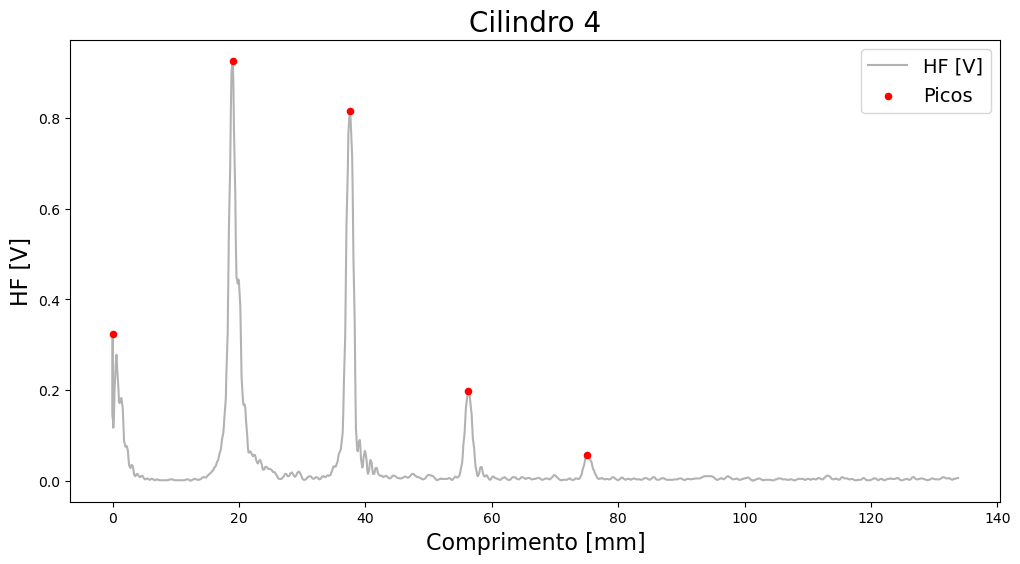

Tempos/Comprimentos dos picos: [ 0.  19.  37.6 56.3 75.1]
Valores dos picos (HF [V]): [0.324 0.927 0.816 0.199 0.056]


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Inicialização
xvals = []  # Coluna de tempo [μs] ou comprimento [mm]
yvals = []  # Coluna HF [V]
skips = 0
is_time_in_microseconds = None  # Variável para verificar a unidade

# Leitura de Dados com a codificação ISO-8859-1 para evitar erro UnicodeDecodeError
with open("/Users/emanuelmiranda/Desktop/Exp7/Dados/tubo 4_2.txt", "r", encoding="ISO-8859-1") as data:
    for line in data:
        if skips == 0:
            skips += 1  # Ignorar a primeira linha com cabeçalhos
            continue
        linha = line.split("\t")
        if len(linha) > 1:
            x_str = linha[0].replace(",", ".")
            y = float(linha[1].replace(",", "."))
            
            # Verificar se a primeira coluna é tempo em μs (caso de tubo 4_1) ou comprimento em mm
            if is_time_in_microseconds is None:
                is_time_in_microseconds = "μs" in line or float(x_str) > 1.0  # heurística baseada em valores
            
            x = float(x_str)
            xvals.append(x)
            yvals.append(y)

# Definir parâmetros para detetar picos
altura_min = 0.05  # Mínima altura que um pico precisa ter
distancia_min = 50  # Mínima distância entre picos, em número de amostras

# Identificação dos picos (máximos locais) nos dados
picos, _ = find_peaks(yvals, height=altura_min, distance=distancia_min)

# Obter os valores de tempo/comprimento e HF correspondentes aos picos
tempos_comprimento_picos = np.array(xvals)[picos]
valores_picos = np.array(yvals)[picos]

# Se for tempo, converter o segundo pico em comprimento usando a velocidade do som
if is_time_in_microseconds:
    velocidade_som = 2699.2  # mm/μs
    comprimento_tubo = (tempos_comprimento_picos[1] - tempos_comprimento_picos[0]) * velocidade_som / 2
    print(f"Comprimento do tubo calculado: {comprimento_tubo:.2f} mm")
else:
    comprimento_tubo = tempos_comprimento_picos[1] - tempos_comprimento_picos[0]
    print(f"Comprimento do tubo a partir dos dados: {comprimento_tubo:.2f} mm")

# Gráfico dos dados completos com os máximos
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Cilindro 4", fontsize=20)
ax.set_ylabel("HF [V]", fontsize=16)
ax.set_xlabel("Tempo [μs]" if is_time_in_microseconds else "Comprimento [mm]", fontsize=16)

# Gráfico original com todos os pontos
ax.plot(xvals, yvals, label="HF [V]", color="gray", alpha=0.6)

# Gráfico apenas com os picos (máximos) detectados
ax.scatter(tempos_comprimento_picos, valores_picos, color="red", label="Picos", s=20, zorder=5)

# Legenda e exibição do gráfico
ax.legend(fontsize=14)
plt.show()

# Print dos tempos/comprimentos e valores dos picos
print("Tempos/Comprimentos dos picos:", tempos_comprimento_picos)
print("Valores dos picos (HF [V]):", valores_picos)


# Fantomas

## Buraco 1

Comprimento do tubo a partir dos dados: 13.00 mm


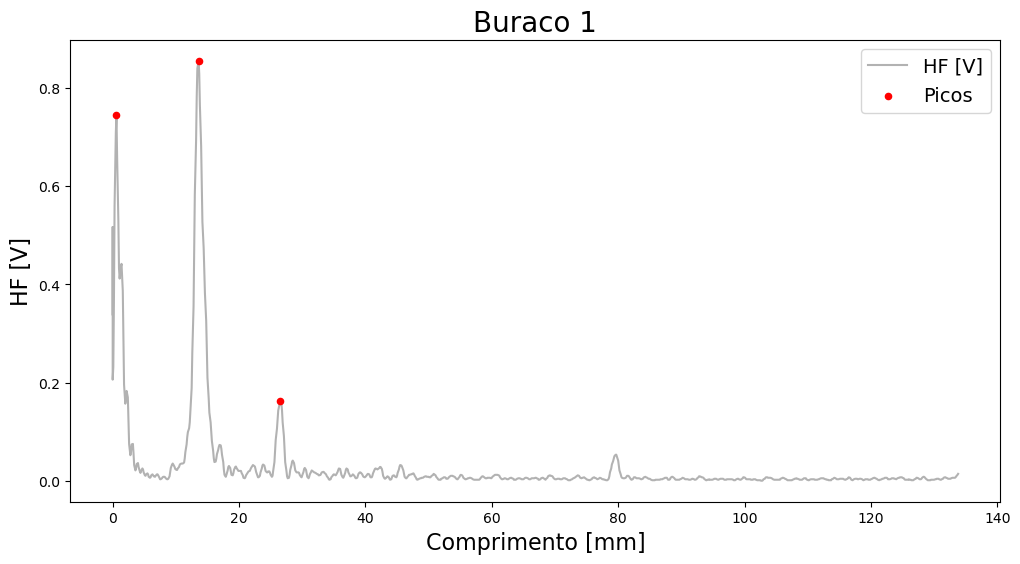

Tempos/Comprimentos dos picos: [ 0.6 13.6 26.5]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Inicialização
xvals = []  # Coluna de tempo [μs] ou comprimento [mm]
yvals = []  # Coluna HF [V]
skips = 0
is_time_in_microseconds = None  # Variável para verificar a unidade

# Leitura de Dados com a codificação ISO-8859-1 para evitar erro UnicodeDecodeError
with open("/Users/emanuelmiranda/Desktop/Exp7/Dados/fantoma A_1.txt", "r", encoding="ISO-8859-1") as data:
    for line in data:
        if skips == 0:
            skips += 1  # Ignorar a primeira linha com cabeçalhos
            continue
        linha = line.split("\t")
        if len(linha) > 1:
            x_str = linha[0].replace(",", ".")
            y = float(linha[1].replace(",", "."))
            
            # Verificar se a primeira coluna é tempo em μs (caso de tubo 4_1) ou comprimento em mm
            if is_time_in_microseconds is None:
                is_time_in_microseconds = "μs" in line or float(x_str) > 1.0  # heurística baseada em valores
            
            x = float(x_str)
            xvals.append(x)
            yvals.append(y)

# Definir parâmetros para detetar picos
altura_min = 0.1  # Mínima altura que um pico precisa ter
distancia_min = 50  # Mínima distância entre picos, em número de amostras

# Identificação dos picos (máximos locais) nos dados
picos, _ = find_peaks(yvals, height=altura_min, distance=distancia_min)

# Obter os valores de tempo/comprimento e HF correspondentes aos picos
tempos_comprimento_picos = np.array(xvals)[picos]
valores_picos = np.array(yvals)[picos]

# Se for tempo, converter o segundo pico em comprimento usando a velocidade do som
if is_time_in_microseconds:
    velocidade_som = 2699.2  # mm/μs
    comprimento_tubo = (tempos_comprimento_picos[1] - tempos_comprimento_picos[0]) * velocidade_som / 2
    print(f"Comprimento do tubo calculado: {comprimento_tubo:.2f} mm")
else:
    comprimento_tubo = tempos_comprimento_picos[1] - tempos_comprimento_picos[0]
    print(f"Comprimento do tubo a partir dos dados: {comprimento_tubo:.2f} mm")

# Gráfico dos dados completos com os máximos
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Buraco 1", fontsize=20)
ax.set_ylabel("HF [V]", fontsize=16)
ax.set_xlabel("Tempo [μs]" if is_time_in_microseconds else "Comprimento [mm]", fontsize=16)

# Gráfico original com todos os pontos
ax.plot(xvals, yvals, label="HF [V]", color="gray", alpha=0.6)

# Gráfico apenas com os picos (máximos) detectados
ax.scatter(tempos_comprimento_picos, valores_picos, color="red", label="Picos", s=20, zorder=5)

# Legenda e exibição do gráfico
ax.legend(fontsize=14)
plt.show()

# Print dos tempos/comprimentos e valores dos picos
print("Tempos/Comprimentos dos picos:", tempos_comprimento_picos)

## Buraco 2

Comprimento do tubo a partir dos dados: 21.80 mm


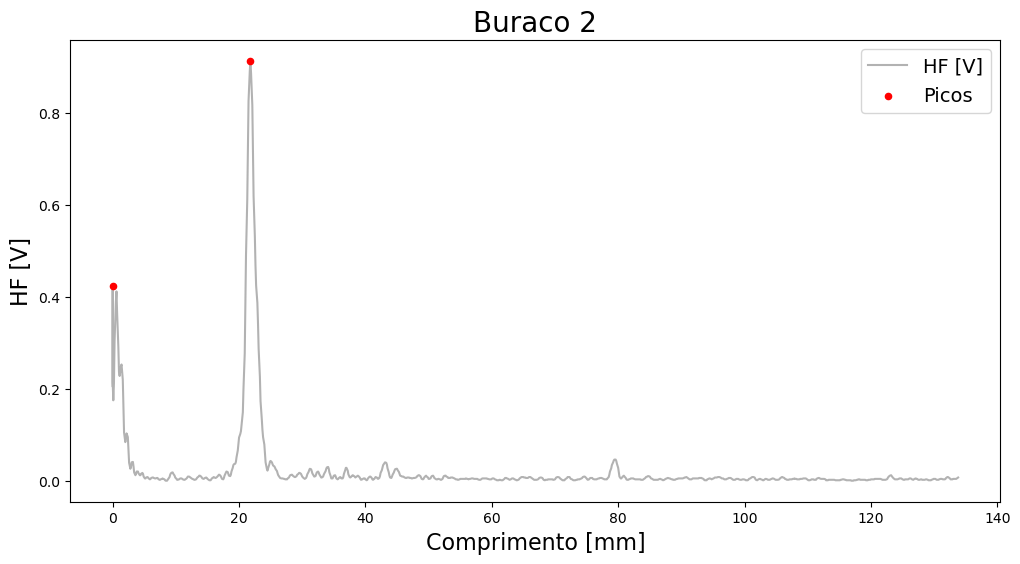

Tempos/Comprimentos dos picos: [ 0.  21.8]


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Inicialização
xvals = []  # Coluna de tempo [μs] ou comprimento [mm]
yvals = []  # Coluna HF [V]
skips = 0
is_time_in_microseconds = None  # Variável para verificar a unidade

# Leitura de Dados com a codificação ISO-8859-1 para evitar erro UnicodeDecodeError
with open("/Users/emanuelmiranda/Desktop/Exp7/Dados/Fantoma A_2.txt", "r", encoding="ISO-8859-1") as data:
    for line in data:
        if skips == 0:
            skips += 1  # Ignorar a primeira linha com cabeçalhos
            continue
        linha = line.split("\t")
        if len(linha) > 1:
            x_str = linha[0].replace(",", ".")
            y = float(linha[1].replace(",", "."))
            
            # Verificar se a primeira coluna é tempo em μs (caso de tubo 4_1) ou comprimento em mm
            if is_time_in_microseconds is None:
                is_time_in_microseconds = "μs" in line or float(x_str) > 1.0  # heurística baseada em valores
            
            x = float(x_str)
            xvals.append(x)
            yvals.append(y)

# Definir parâmetros para detetar picos
altura_min = 0.05  # Mínima altura que um pico precisa ter
distancia_min = 50  # Mínima distância entre picos, em número de amostras

# Identificação dos picos (máximos locais) nos dados
picos, _ = find_peaks(yvals, height=altura_min, distance=distancia_min)

# Obter os valores de tempo/comprimento e HF correspondentes aos picos
tempos_comprimento_picos = np.array(xvals)[picos]
valores_picos = np.array(yvals)[picos]

# Se for tempo, converter o segundo pico em comprimento usando a velocidade do som
if is_time_in_microseconds:
    velocidade_som = 2699.2  # mm/μs
    comprimento_tubo = (tempos_comprimento_picos[1] - tempos_comprimento_picos[0]) * velocidade_som / 2
    print(f"Comprimento do tubo calculado: {comprimento_tubo:.2f} mm")
else:
    comprimento_tubo = tempos_comprimento_picos[1] - tempos_comprimento_picos[0]
    print(f"Comprimento do tubo a partir dos dados: {comprimento_tubo:.2f} mm")

# Gráfico dos dados completos com os máximos
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Buraco 2", fontsize=20)
ax.set_ylabel("HF [V]", fontsize=16)
ax.set_xlabel("Tempo [μs]" if is_time_in_microseconds else "Comprimento [mm]", fontsize=16)

# Gráfico original com todos os pontos
ax.plot(xvals, yvals, label="HF [V]", color="gray", alpha=0.6)

# Gráfico apenas com os picos (máximos) detectados
ax.scatter(tempos_comprimento_picos, valores_picos, color="red", label="Picos", s=20, zorder=5)

# Legenda e exibição do gráfico
ax.legend(fontsize=14)
plt.show()

# Print dos tempos/comprimentos e valores dos picos
print("Tempos/Comprimentos dos picos:", tempos_comprimento_picos)

## Buraco 3

Comprimento do tubo a partir dos dados: 29.90 mm


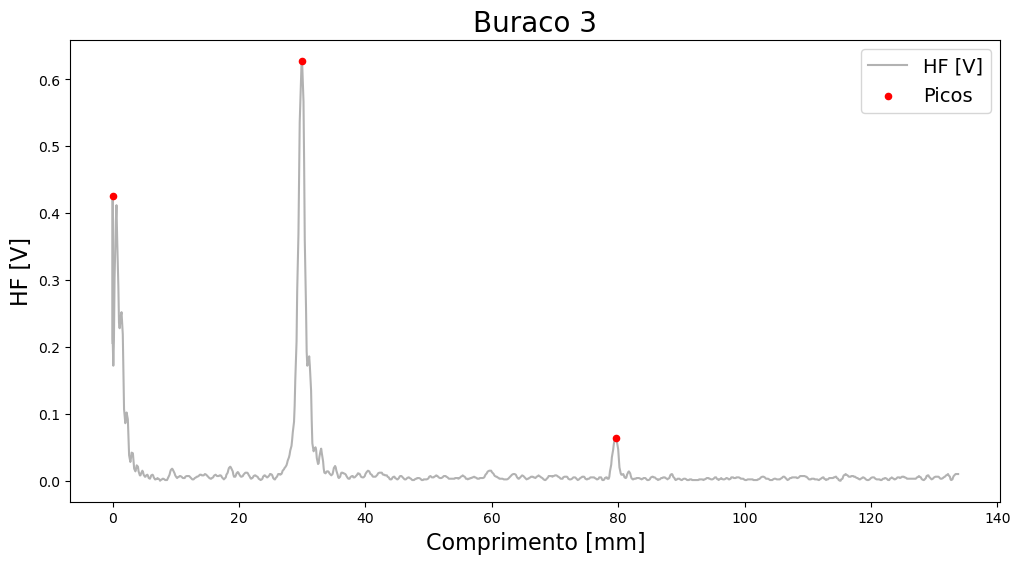

Tempos/Comprimentos dos picos: [ 0.  29.9 79.6]


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Inicialização
xvals = []  # Coluna de tempo [μs] ou comprimento [mm]
yvals = []  # Coluna HF [V]
skips = 0
is_time_in_microseconds = None  # Variável para verificar a unidade

# Leitura de Dados com a codificação ISO-8859-1 para evitar erro UnicodeDecodeError
with open("/Users/emanuelmiranda/Desktop/Exp7/Dados/Fantoma A_3.txt", "r", encoding="ISO-8859-1") as data:
    for line in data:
        if skips == 0:
            skips += 1  # Ignorar a primeira linha com cabeçalhos
            continue
        linha = line.split("\t")
        if len(linha) > 1:
            x_str = linha[0].replace(",", ".")
            y = float(linha[1].replace(",", "."))
            
            # Verificar se a primeira coluna é tempo em μs (caso de tubo 4_1) ou comprimento em mm
            if is_time_in_microseconds is None:
                is_time_in_microseconds = "μs" in line or float(x_str) > 1.0  # heurística baseada em valores
            
            x = float(x_str)
            xvals.append(x)
            yvals.append(y)

# Definir parâmetros para detetar picos
altura_min = 0.05  # Mínima altura que um pico precisa ter
distancia_min = 50  # Mínima distância entre picos, em número de amostras

# Identificação dos picos (máximos locais) nos dados
picos, _ = find_peaks(yvals, height=altura_min, distance=distancia_min)

# Obter os valores de tempo/comprimento e HF correspondentes aos picos
tempos_comprimento_picos = np.array(xvals)[picos]
valores_picos = np.array(yvals)[picos]

# Se for tempo, converter o segundo pico em comprimento usando a velocidade do som
if is_time_in_microseconds:
    velocidade_som = 2699.2  # mm/μs
    comprimento_tubo = (tempos_comprimento_picos[1] - tempos_comprimento_picos[0]) * velocidade_som / 2
    print(f"Comprimento do tubo calculado: {comprimento_tubo:.2f} mm")
else:
    comprimento_tubo = tempos_comprimento_picos[1] - tempos_comprimento_picos[0]
    print(f"Comprimento do tubo a partir dos dados: {comprimento_tubo:.2f} mm")

# Gráfico dos dados completos com os máximos
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Buraco 3", fontsize=20)
ax.set_ylabel("HF [V]", fontsize=16)
ax.set_xlabel("Tempo [μs]" if is_time_in_microseconds else "Comprimento [mm]", fontsize=16)

# Gráfico original com todos os pontos
ax.plot(xvals, yvals, label="HF [V]", color="gray", alpha=0.6)

# Gráfico apenas com os picos (máximos) detectados
ax.scatter(tempos_comprimento_picos, valores_picos, color="red", label="Picos", s=20, zorder=5)

# Legenda e exibição do gráfico
ax.legend(fontsize=14)
plt.show()

# Print dos tempos/comprimentos e valores dos picos
print("Tempos/Comprimentos dos picos:", tempos_comprimento_picos)